In [1]:
import pandas as pd
#settings :
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 1000)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno 

In [2]:
data = pd.read_csv("credit_risk_dataset.csv")
data.head(2)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [4]:
data.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [5]:
data['loan_int_rate'].fillna((data['loan_int_rate'].mean()), inplace=True)
data['person_emp_length'].fillna((data['person_emp_length'].mean()), inplace=True)

In [6]:
data.isna().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [7]:
data["person_home_ownership"].value_counts()

RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: person_home_ownership, dtype: int64

In [8]:
data.person_home_ownership.replace({"RENT":0,"MORTGAGE":1,"OWN":2,"OTHER":3}, inplace=True)

In [9]:
data["loan_intent"].value_counts()

EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: loan_intent, dtype: int64

In [10]:
data.loan_intent.replace({"EDUCATION":0,"MEDICAL":1,"VENTURE":2,"PERSONAL":3,"DEBTCONSOLIDATION":4,"HOMEIMPROVEMENT":5}, inplace=True)

In [11]:
data["loan_grade"].value_counts()

A    10777
B    10451
C     6458
D     3626
E      964
F      241
G       64
Name: loan_grade, dtype: int64

In [12]:
data.loan_grade.replace({"A":0,"B":1,"C":2,"D":3,"E":4,"F":5,"G":6}, inplace=True)

In [13]:
data["cb_person_default_on_file"].value_counts()

N    26836
Y     5745
Name: cb_person_default_on_file, dtype: int64

In [14]:
data.cb_person_default_on_file.replace({"N":0,"Y":1}, inplace=True)

In [16]:
data.head(2)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,0,123.0,3,3,35000,16.02,1,0.59,1,3
1,21,9600,2,5.0,0,1,1000,11.14,0,0.10,0,2


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  int64  
 3   person_emp_length           32581 non-null  float64
 4   loan_intent                 32581 non-null  int64  
 5   loan_grade                  32581 non-null  int64  
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               32581 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  int64  
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(9)
memory usage: 3.0 MB


<AxesSubplot:ylabel='loan_status'>

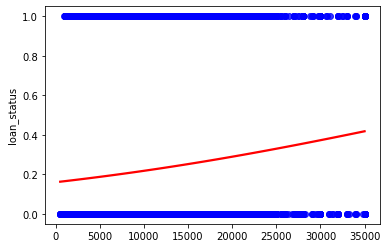

In [23]:
x = data['loan_amnt']
y = data['loan_status']

#plot logistic regression curve with blue points and red line
sns.regplot(x=[x], y=y, data=data, logistic=True, ci=None, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

In [24]:
X = data.drop(['loan_status','person_income'], axis=1)
y = data['loan_status']

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X)
X_train = pd.DataFrame(X)
X_train.columns = X.columns

In [26]:
import statsmodels.api as sm
from scipy import stats
X2 = sm.add_constant(X_train)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:            loan_status   R-squared:                       0.308
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     1447.
Date:                Thu, 06 Apr 2023   Prob (F-statistic):               0.00
Time:                        19:54:53   Log-Likelihood:                -11432.
No. Observations:               32581   AIC:                         2.289e+04
Df Residuals:                   32570   BIC:                         2.298e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               